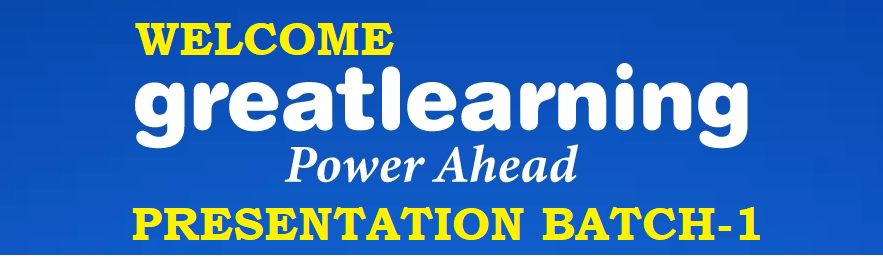

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

# Basic Data Exploration with Pandas

In [2]:
sal_dataset = pd.read_csv('2010_Report_to_Congress_on_White_House_Staff.csv')

sal_dataset


,Employee Name,Employee Status,Salary,Pay Basis,Position Title
0,"Abrams, Adam W.",Employee,66300.0,Per Annum,WESTERN REGIONAL COMMUNICATIONS DIRECTOR
1,"Adams, Ian H.",Employee,45000.0,Per Annum,EXECUTIVE ASSISTANT TO THE DIRECTOR OF SCHEDUL...
2,"Agnew, David P.",Employee,93840.0,Per Annum,DEPUTY DIRECTOR OF INTERGOVERNMENTAL AFFAIRS
3,"Albino, James",Employee,91800.0,Per Annum,SENIOR PROGRAM MANAGER
4,"Aldy, Jr., Joseph E.",Employee,130500.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR ENERGY ...
...,...,...,...,...,...
464,"Young, Jr., Reginald D.",Employee,60232.0,Per Annum,RECORDS MANAGEMENT ANALYST
465,"Young, Katherine H.",Employee,42000.0,Per Annum,STAFF ASSISTANT
466,"Young, Latoya A.",Employee,58511.0,Per Annum,RECORDS MANAGEMENT ANALYST
467,"Zelman, Allison L.",Employee,50000.0,Per Annum,POLICY ASSISTANT


In [4]:
sal_dataset.columns


Index(['Employee Name', 'Employee Status', 'Salary', 'Pay Basis',
       'Position Title'],
      dtype='object')

In [5]:
duplicatedf = sal_dataset[sal_dataset.duplicated(keep=False)]

duplicatedf

,Employee Name,Employee Status,Salary,Pay Basis,Position Title


In [6]:
sal_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Employee Name    469 non-null    object 
 1   Employee Status  469 non-null    object 
 2   Salary           469 non-null    float64
 3   Pay Basis        469 non-null    object 
 4   Position Title   469 non-null    object 
dtypes: float64(1), object(4)
memory usage: 18.4+ KB


In [7]:
sal_dataset.describe()
#Generate descriptive statistics

,Salary
count,469.000000
mean,82721.336887
std,41589.433381
min,0.000000
25%,45900.000000
50%,66300.000000
75%,113000.000000
max,179700.000000


In [8]:
sal_dataset.describe(include = 'all')
#Generate descriptive statistics - 'all' : All columns of the input will be included in the output.

,Employee Name,Employee Status,Salary,Pay Basis,Position Title
count,469,469,469.000000,469,469
unique,469,3,NaN,1,269
top,"Winter, Melissa",Employee,NaN,Per Annum,STAFF ASSISTANT
freq,1,437,NaN,469,24
mean,NaN,NaN,82721.336887,NaN,NaN
std,NaN,NaN,41589.433381,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,45900.000000,NaN,NaN
50%,NaN,NaN,66300.000000,NaN,NaN
75%,NaN,NaN,113000.000000,NaN,NaN


In [13]:
sal_dataset.sort_values(by='Salary',ascending=False).head(5)

,Employee Name,Employee Status,Salary,Pay Basis,Position Title
166,"Hash, Michael M.",Detailee,179700.0,Per Annum,DEPUTY DIRECTOR
258,"Love, Timothy P.",Detailee,179700.0,Per Annum,POLICY DIRECTOR
116,"Emanuel, Rahm I.",Employee,172200.0,Per Annum,ASSISTANT TO THE PRESIDENT AND CHIEF OF STAFF
121,"Favreau, Jonathan E.",Employee,172200.0,Per Annum,ASSISTANT TO THE PRESIDENT AND DIRECTOR OF SPE...
410,"Sutphen, Mona K.",Employee,172200.0,Per Annum,ASSISTANT TO THE PRESIDENT AND DEPUTY CHIEF OF...


In [3]:
sal_dataset['Rank'] = sal_dataset.Salary.rank(method='dense',axis=0,ascending=False)

sal_dataset.sort_values('Rank',ascending = True)

,Employee Name,Employee Status,Salary,Pay Basis,Position Title,Rank
258,"Love, Timothy P.",Detailee,179700.0,Per Annum,POLICY DIRECTOR,1.0
166,"Hash, Michael M.",Detailee,179700.0,Per Annum,DEPUTY DIRECTOR,1.0
101,"Donilon, Thomas E.",Employee,172200.0,Per Annum,ASSISTANT TO THE PRESIDENT AND DEPUTY NATIONAL...,2.0
409,"Summers, Lawrence H.",Employee,172200.0,Per Annum,ASSISTANT TO THE PRESIDENT FOR ECONOMIC POLICY...,2.0
270,"Mastromonaco, Alyssa M.",Employee,172200.0,Per Annum,ASSISTANT TO THE PRESIDENT AND DIRECTOR OF SCH...,2.0
...,...,...,...,...,...,...
248,"Liegel, Christopher J.",Employee,37826.0,Per Annum,RECORDS MANAGEMENT ANALYST,118.0
235,"Leitner-Laserna, Sofia I.",Employee (part-time),21000.0,Per Annum,STAFF ASSISTANT,119.0
66,"Chen, Margaret C.",Employee,0.0,Per Annum,SPECIAL ASSISTANT,120.0
461,"Wong, Shale L.",Employee,0.0,Per Annum,POLICY ADVISOR,120.0


# Analysis of Data

### Employee status

In [10]:
sal_dataset.groupby(by='Employee Status').describe()

Salary                                                 \
                      count           mean           std      min      25%   
Employee Status                                                              
Detailee               31.0  122203.322581  34877.164448  51630.0  93485.0   
Employee              437.0   80061.794050  40574.262376      0.0  45900.0   
Employee (part-time)    1.0   21000.000000           NaN  21000.0  21000.0   

                                                    
                           50%       75%       max  
Employee Status                                     
Detailee              123758.0  152005.0  179700.0  
Employee               65000.0  102000.0  172200.0  
Employee (part-time)   21000.0   21000.0   21000.0

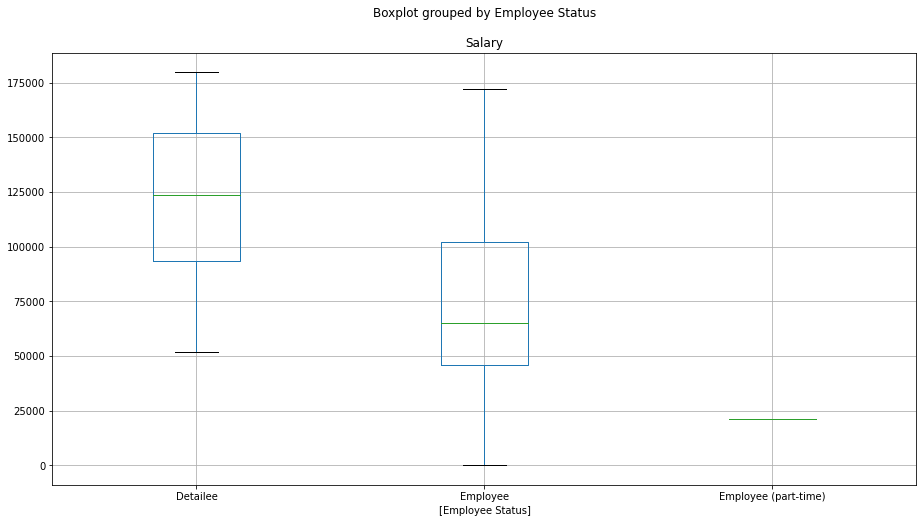

In [11]:
boxplot = sal_dataset.boxplot(by='Employee Status',figsize=(15,8))

### How is the salary calculated : Yearly, monthly or weekly

In [12]:
sal_dataset.groupby(by='Pay Basis').describe() 

Salary                                                               \
           count          mean           std  min      25%      50%       75%   
Pay Basis                                                                       
Per Annum  469.0  82721.336887  41589.433381  0.0  45900.0  66300.0  113000.0   

                     
                max  
Pay Basis            
Per Annum  179700.0

### How many unique Positions are available

In [13]:
sal_dataset['Position Title'].unique().size

269

### Employee with 0 salary

In [14]:
sal_dataset[sal_dataset.Salary==0]

,Employee Name,Employee Status,Salary,Pay Basis,Position Title
66,"Chen, Margaret C.",Employee,0.0,Per Annum,SPECIAL ASSISTANT
277,"McGinnis, Patricia G.",Employee,0.0,Per Annum,ADVISOR
461,"Wong, Shale L.",Employee,0.0,Per Annum,POLICY ADVISOR


### Salary classification for different Position Title

In [15]:
sal_dataset['Salary_Classify'] = sal_dataset.apply(lambda x: 'greater than 50k' if x.Salary >= 50000 else 'less than 50k', axis=1)
sal_dataset[['Salary_Classify','Position Title']].value_counts()

Salary_Classify   Position Title                                                           
less than 50k     STAFF ASSISTANT                                                              24
greater than 50k  SPECIAL ASSISTANT TO THE PRESIDENT FOR LEGISLATIVE AFFAIRS                   10
less than 50k     ANALYST                                                                      10
greater than 50k  SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIATE COUNSEL TO THE PRESIDENT    10
                  RECORDS MANAGEMENT ANALYST                                                    8
                                                                                               ..
                  SPECIAL ASSISTANT TO THE DIRECTOR                                             1
                  SPECIAL ASSISTANT TO THE DEPUTY ASSISTANT TO THE PRESIDENT                    1
                  SPECIAL ASSISTANT TO THE CHIEF OF STAFF                                       1
                  SPECIAL 

In [39]:
sal_dataset[sal_dataset['Position Title'] == 'STAFF ASSISTANT']

,Employee Name,Employee Status,Salary,Pay Basis,Position Title,Salary_Classify
5,"Alley, Hilary J.",Employee,42000.0,Per Annum,STAFF ASSISTANT,less than 50k
15,"Baggetto, Maude L.",Employee,42000.0,Per Annum,STAFF ASSISTANT,less than 50k
35,"Block, Michael R.",Employee,42000.0,Per Annum,STAFF ASSISTANT,less than 50k
59,"Carden, Meredith M.",Employee,42000.0,Per Annum,STAFF ASSISTANT,less than 50k
68,"Chhabra, Anand",Employee,42000.0,Per Annum,STAFF ASSISTANT,less than 50k
73,"Cobbina, Kwesi A.",Employee,42000.0,Per Annum,STAFF ASSISTANT,less than 50k
77,"Conrad, Shasti K.",Employee,42000.0,Per Annum,STAFF ASSISTANT,less than 50k
82,"Cuba, Juan C.",Employee,42000.0,Per Annum,STAFF ASSISTANT,less than 50k
122,"Fenn, Sarah B.",Employee,42000.0,Per Annum,STAFF ASSISTANT,less than 50k
123,"Fergenson, Micah F.",Employee,42000.0,Per Annum,STAFF ASSISTANT,less than 50k


### The count of positions in descending order for the first 10 position titles

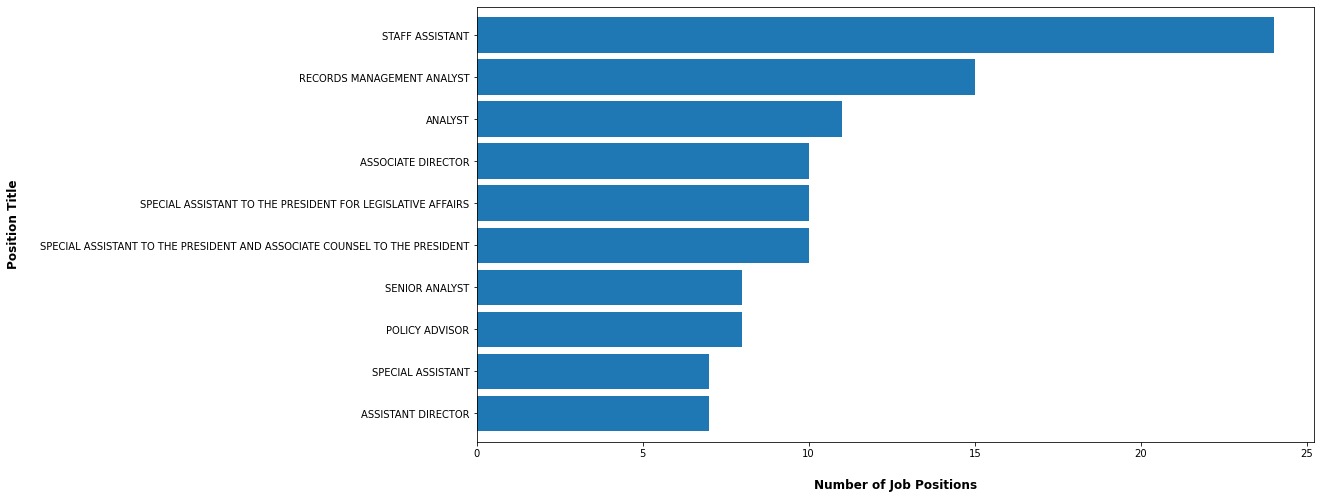

In [29]:
x = sal_dataset['Position Title'].value_counts().head(10).sort_values()
ax = x.plot(kind='barh', zorder=2, width=0.85,figsize=(15,8))
ax.set_xlabel("Number of Job Positions", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Position Title", labelpad=20, weight='bold', size=12)
plt.show()

### Trying to get heat map as per Employee status and Salary

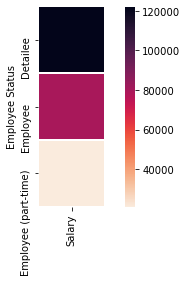

<Figure size 1080x360 with 0 Axes>

In [8]:
piv = pd.pivot_table(sal_dataset, values=['Salary'],index=["Employee Status"])
cmap = sns.cm.rocket_r
ax = sns.heatmap(piv, square=True,linewidths=0.5,cmap=cmap)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.figure(figsize=(15,5))
plt.show()

### Salary distribution as per Employee status
Line graph to show the sum of salary vs particular employee status 

Employee Status
Employee                34987004.0
Detailee                 3788303.0
Employee (part-time)       21000.0
Name: Salary, dtype: float64


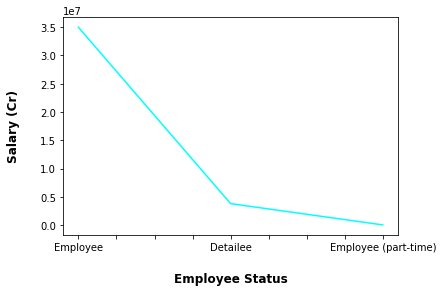

In [24]:
x1 = sal_dataset.groupby(['Employee Status'])['Salary'].sum().sort_values(ascending=False).head()
print(x1)
ax = x1.plot(kind='line', color='cyan')
ax.set_xlabel("Employee Status", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Salary (Cr)", labelpad=20, weight='bold', size=12)
plt.show()

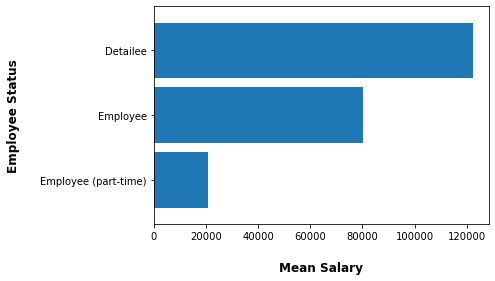

In [19]:
x = sal_dataset.groupby('Employee Status').Salary.mean().sort_values()
ax = x.plot(kind='barh', zorder=2, width=0.85)
ax.set_xlabel("Mean Salary", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Employee Status", labelpad=20, weight='bold', size=12)
plt.show()

### Salary distribution as per Position Title

In [33]:
sal_dataset.groupby(['Position Title'])['Salary'].sum().sort_values(ascending=False).head()

Position Title
SPECIAL ASSISTANT TO THE PRESIDENT FOR LEGISLATIVE AFFAIRS                   1305000.0
SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIATE COUNSEL TO THE PRESIDENT    1288500.0
STAFF ASSISTANT                                                               987840.0
RECORDS MANAGEMENT ANALYST                                                    795670.0
DEPUTY ASSOCIATE COUNSEL FOR PRESIDENTIAL PERSONNEL                           656211.0
Name: Salary, dtype: float64

In [21]:
sal_dataset.groupby('Position Title')['Salary'].mean().sort_values(ascending=False)

Position Title
POLICY DIRECTOR                                                           179700.0
NATIONAL SECURITY ADVISOR                                                 172200.0
ASSISTANT TO THE PRESIDENT AND DIRECTOR OF POLITICAL AFFAIRS              172200.0
ASSISTANT TO THE PRESIDENT AND SENIOR ADVISOR                             172200.0
ASSISTANT TO THE PRESIDENT AND DIRECTOR, OFFICE OF LEGISLATIVE AFFAIRS    172200.0
                                                                            ...   
ENERGY AND ENVIRONMENT STAFF ASSISTANT                                     42000.0
BOARDS AND COMMISSIONS STAFF ASSISTANT                                     42000.0
NATIONAL SECURITY STAFF ASSISTANT                                          42000.0
ADVANCE COORDINATOR                                                        42000.0
STAFF ASSISTANT                                                            41160.0
Name: Salary, Length: 269, dtype: float64

In [38]:
sal_dataset.groupby(['Employee Status','Position Title'])['Salary'].mean().sort_values(ascending=False).head()

Employee Status  Position Title                                                        
Detailee         POLICY DIRECTOR                                                           179700.0
                 DEPUTY DIRECTOR                                                           179700.0
Employee         ASSISTANT TO THE PRESIDENT AND DEPUTY CHIEF OF STAFF FOR OPERATIONS       172200.0
                 ASSISTANT TO THE PRESIDENT AND DIRECTOR, OFFICE OF LEGISLATIVE AFFAIRS    172200.0
                 ASSISTANT TO THE PRESIDENT FOR SPECIAL PROJECTS                           172200.0
Name: Salary, dtype: float64